<a href="https://colab.research.google.com/github/jcjimenezb123/MetodosNumericosPython/blob/master/EcLaplaceDirichlet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Calculando...
Terminado!


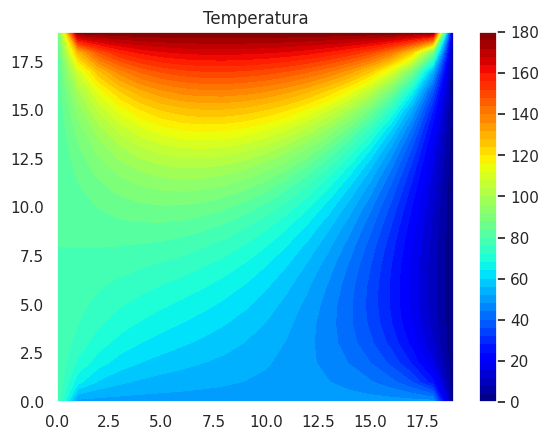

In [2]:
# Solución de la ecuación de Laplace usando el método de diferencias finitas
import numpy as np
import matplotlib.pyplot as plt
# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_theme()

# número máximo de iteraciones
maxIter = 500

# dimensiones y delta
lenX = lenY = 20 #suponemos una placa cuadrada
delta = 1

# Condiciones de Dirichlet
Ttop = 180
Tbottom = 50
Tleft = 80
Tright = 0

# valor inicial al interior de la placa
Tguess = 30

# colores de intepolación
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# crear la regilla
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# inicializa los nodos de la región de estudio
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Coloca los valores de las fronteras
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft

# Iteraciones asumiendo que converge en el número máximo de iteraciones
print("Calculando...")
for iteration in range(0, maxIter):
  for i in range(1, lenX-1, delta):
    for j in range(1, lenY-1, delta):
      T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] +\
                        T[i][j+1] + T[i][j-1])

print("Terminado!")

# se crea la gráfica
plt.title("Temperatura")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Colorbar
plt.colorbar()

# muestra la gráfica
plt.show()